#### Helper Functions

In [6]:
import numpy as np
def generate_low_rank_data(n_features, n_samples, rank):
    """
    Generates a low rank data matrix.
    """
    rank = min(rank, n_features, n_samples)
    A = np.random.randn(n_features, rank) @ np.random.randn(rank, n_samples)
    
    return A

In [7]:
import numpy as np
def frobenius_norm_difference(A, B):
    """
        Calculates the Frobenius norm of the difference between two matrices.
    """
    return np.linalg.norm(A - B, 'fro') / np.linalg.norm(A, 'fro')

def sample_covariance_estimator(X):
    """
        Estimates the covariance matrix of a data matrix.
    """
    n = X.shape[1]
    covariance_matrix = np.dot(X, X.T) / n
    
    return covariance_matrix

In [4]:
def compare_eigenvalues(eigvals_sample, eigvals_nystrom, k):
    eigvals_sample = eigvals_sample[:, :k]
    eigvals_nystrom = eigvals_nystrom[:, :k]
    relative_error = np.linalg.norm(eigvals_sample - eigvals_nystrom) / np.linalg.norm(eigvals_sample)
    return relative_error

def compare_eigenvectors(eigvecs_sample, eigvecs_nystrom, k):
    eigvecs_sample = eigvecs_sample[:, :k]
    eigvecs_nystrom = eigvecs_nystrom[:, :k]
    # Adjust signs
    for i in range(eigvecs_sample.shape[1]):
        if np.dot(eigvecs_sample[:, i], eigvecs_nystrom[:, i]) < 0:
            eigvecs_nystrom[:, i] *= -1
    
    frobenius_norm = np.linalg.norm(eigvecs_sample - eigvecs_nystrom, 'fro') / np.linalg.norm(eigvecs_sample, 'fro')
    return frobenius_norm

#### Data Loader

In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Get the list of S&P 500 companies from Wikipedia
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '', regex=False)
symbols_list = sp500['Symbol'].to_list()

# Step 2: Download the adjusted close price data for each ticker for the past year
data = yf.download(symbols_list, start="2023-08-01", end="2024-08-01", group_by='ticker', auto_adjust=True)

# Step 3: Ensure we are accessing the 'Adj Close' correctly
if isinstance(data.columns, pd.MultiIndex):
    data = data.xs('Close', axis=1, level=1)

# Step 4: Transpose the data so that each row corresponds to a ticker
data = data.transpose()
data = data.pct_change(axis=1)

# Step 5: Save the DataFrame to a pickle file
data.to_pickle('sp500.pkl')

# Confirm the file was saved
print("Data has been saved to 'sp500_adjusted_close.pkl'")


In [69]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Step 1: Read tickers from a text file
with open('stocks.txt', 'r') as file:
    symbols_list = [line.strip() for line in file.readlines()]

# Step 2: Define the time range for the opening hour on August 6, 2024 using datetime objects
start_time = datetime(2024, 8, 6, 9, 30)
end_time = datetime(2024, 8, 6, 12, 30)

# Step 3: Download the minute data for each ticker
minute_data = {}
for symbol in symbols_list:
    ticker = yf.Ticker(symbol)
    try:
        data = ticker.history(start=start_time, end=end_time, interval="1m", auto_adjust=True)
        minute_data[symbol] = data['Close']
    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")

# Step 4: Combine all tickers' data into a single DataFrame
minute_data_df = pd.DataFrame(minute_data)

# Step 4: Transpose the data so that each row corresponds to a ticker
minute_returns = minute_data_df.transpose()
minute_returns = minute_returns.pct_change(axis=1)

threshold = int(0.1 * minute_returns.shape[1])
minute_returns = minute_returns.dropna(thresh=threshold, axis=0)
minute_returns = minute_returns.bfill(axis=1)
minute_returns = minute_returns.ffill(axis=1)

# Step 5: Save the DataFrame to a pickle file
minute_returns.to_pickle('russell_minute_data.pkl')

# Confirm the file was saved
print("Minute data has been saved to 'russell_minute_data.pkl'")


$ADTH: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$ADTH: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$AEL: possibly delisted; No timezone found
$AGTI: possibly delisted; No timezone found
$AJRD: possibly delisted; No timezone found
$ALPN: possibly delisted; No timezone found
$AMEH: possibly delisted; No timezone found
$AMNB: possibly delisted; No timezone found
AMRS: Period '1mo' is invalid, must be one of ['1d', '5d']
$APPH: possibly delisted; No timezone found
$ARGO: possibly delisted; No timezone found
$ARNC: possibly delisted; No timezone found
$ASTR: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$ASTR: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$AVID: possibly delisted; No timezone found
AVTA: Period '1mo' is invalid, must be one of ['1d', '5d']
$BVH: possibly delisted; No timezone found
$CANO: possibly delisted; No timezone found
$CASA: possibly delisted; No timezone found
$CATC: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$CATC: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$CCF: possibly delisted; No timezone found
$CELL: possibly delisted; No timezone found
$CERE: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$CERE: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$CHS: possibly delisted; No timezone found
$CIR: possibly delisted; No timezone found
$CONN: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$CONN: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$CPE: possibly delisted; No timezone found
$CPSI: possibly delisted; No timezone found
$CRGE: possibly delisted; No timezone found
$CSTR: possibly delisted; No timezone found
$CTIC: possibly delisted; No timezone found
$CURO: possibly delisted; No timezone found
$CVT: possibly delisted; No timezone found
$DCPH: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$DCPH: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$DEN: possibly delisted; No timezone found
$DICE: possibly delisted; No timezone found
$DOOR: possibly delisted; No timezone found
$DSEY: possibly delisted; No timezone found
$DSKE: possibly delisted; No timezone found
$EBIX: possibly delisted; No timezone found
$EGLE: possibly delisted; No timezone found
$EIGR: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$EIGR: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$ENOB: possibly delisted; No timezone found
$EQRX: possibly delisted; No timezone found
$ESMT: possibly delisted; No timezone found
$ESTE: possibly delisted; No timezone found
$ETRN: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)
$EVBG: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$ETRN: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)
$EVBG: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$EXPR: possibly delisted; No timezone found
$FOCS: possibly delisted; No timezone found
$FORG: possibly delisted; No timezone found
$FRBK: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)
$FREE: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)
FRG: Period '1mo' is invalid, must be one of ['1d', '5d']


$FRBK: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)
$FREE: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$FSR: possibly delisted; No timezone found
$FXLV: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$FXLV: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$GRNA: possibly delisted; No timezone found
$HCCI: possibly delisted; No timezone found
$HIBB: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$HIBB: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$HLTH: possibly delisted; No timezone found
$HMPT: possibly delisted; No timezone found
$HRT: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$HRT: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$HT: possibly delisted; No timezone found
$ICPT: possibly delisted; No timezone found
$ICVX: possibly delisted; No timezone found
$IMGN: possibly delisted; No timezone found
$INDT: possibly delisted; No timezone found
$IRNT: possibly delisted; No timezone found
$ISEE: possibly delisted; No timezone found
$JOAN: possibly delisted; No timezone found
$KAMN: possibly delisted; No timezone found
$KDNY: possibly delisted; No timezone found
$KLR: possibly delisted; No timezone found
$KNTE: possibly delisted; No timezone found
$KRTX: possibly delisted; No timezone found
$LBAI: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$LBAI: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$LBC: possibly delisted; No timezone found
$LTHM: possibly delisted; No timezone found
$LVOX: possibly delisted; No timezone found
$MCBC: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$MCBC: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$MDC: possibly delisted; No timezone found
$MODN: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$MODN: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$NETI: possibly delisted; No timezone found
$NEX: possibly delisted; No timezone found
$NGM: possibly delisted; No timezone found
$NGMS: possibly delisted; No timezone found
$NSTG: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)


$NSTG: possibly delisted; No price data found  (1m 2024-08-06 09:30:00 -> 2024-08-06 12:30:00)
Minute data has been saved to 'russell_minute_data.pkl'


/var/folders/85/xp45dt5j04s4zr5n2396mrpr0000gn/T/ipykernel_87905/4000406885.py:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  minute_returns = minute_returns.pct_change(axis=1)


#### Nystrom Covariance

In [13]:
def nystrom_covariance_estimator(X, indices):
   """
   Estimates the covariance matrix of a data matrix using the Nyström method.

   Parameters:
   -----------
   X : numpy.ndarray
       The input data matrix of shape (p, n), where p is the number of features
       and n is the number of samples.
   indices : numpy.ndarray
       The indices of the landmark points to be used in the Nyström method.

   Returns:
   --------
   Sigma_hat : numpy.ndarray
       The estimated covariance matrix of shape (p, p).
   """
   p, n = X.shape      # p: number of features, n: number of samples

   # Step 1: Use the provided landmark indices
   Y = X[indices, :]      # Y.shape = (num_landmarks, p)

   # Step 2: Compute the orthogonal projection matrix P using the pseudoinverse
   YYT = Y @ Y.T
   YYT_pinv = np.linalg.pinv(YYT)
   P = Y.T @ (YYT_pinv @ Y)    # P.shape = (p, p)

  
   Sigma_hat = X @ P @ X.T / n    # Sigma_hat.shape = (p, p)
  
   return Sigma_hat

##### Nystrom Covariance: Column Norm Sampling

In [23]:
def column_norm_sample(X, num_landmarks, replace=False):
    """Samples columns based on the column norms of a data matrix."""
    p, n = X.shape 
    
    # Step 1: Compute the column norms
    column_norms = np.linalg.norm(X, axis=0) 

    # Step 2: Compute the probabilities
    probabilities = column_norms ** 2
    probabilities /= np.sum(probabilities)

    # Step 3: Sample indices based on the probabilities
    indices = np.random.choice(n, num_landmarks, replace=replace, p=probabilities)

    return indices

##### Nystrom Covariance: Uniform Random Sampling

In [24]:
def uniform_random_sample(X, num_landmarks, replace=False):
    """
    Samples column indices uniformly at random from a data matrix.
    """
    p, n = X.shape 
    indices = np.random.choice(n, num_landmarks, replace=replace)
    return indices

##### Nystrom Covariance: Incomplete Cholesky Sampling

In [9]:
def recursive_rls_sample(X, num_landmarks=None, replace=False, accelerated_flag=False):
    p, r = X.shape
    
    if num_landmarks is None:
        s = int(np.ceil(np.sqrt(p)))
    else:
        s = num_landmarks
    
    kernel_func = lambda X, row_ind, col_ind: (X[row_ind, :] @ X[col_ind, :].T if len(col_ind) > 0 else np.sum(X[row_ind, :]**2, axis=1))
    
    if not accelerated_flag:
        s_level = s
    else:
        s_level = int(np.ceil(np.sqrt((p * s + s**3) / (4 * p))))
    
    oversamp = np.log(s_level)
    k = int(np.ceil(s_level / (4 * oversamp)))
    n_levels = int(np.ceil(np.log(p / s_level) / np.log(2)))
    
    perm = np.random.permutation(p)
    
    l_size = [p]
    for _ in range(n_levels):
        l_size.append(int(np.ceil(l_size[-1] / 2)))
    
    samp = np.arange(l_size[-1])
    r_ind = perm[samp]
    weights = np.ones(len(r_ind))
    
    k_diag = kernel_func(X, np.arange(p), [])
    
    for l in range(n_levels, 0, -1):
        r_ind_curr = perm[:l_size[l-1]]
        KS = kernel_func(X, r_ind_curr, r_ind)
        SKS = KS[samp, :]
        SKSn = SKS.shape[0]
        
        if k >= SKSn:
            lambda_ = 1e-6
        else:
            diag_sum = np.sum((SKS.diagonal() * weights**2))
            SKS_weighted = SKS * weights[:, np.newaxis]
            eigvals = eigsh(SKS_weighted @ SKS_weighted.T, k=k, which='LM', return_eigenvectors=False)
            eig_sum = np.sum(np.abs(eigvals))
            lambda_ = (diag_sum - eig_sum) / k
        
        if l != 1:
            R = linalg.inv(SKS + np.diag(lambda_ * weights**(-2)))
            levs = np.maximum(0, np.minimum(1, oversamp * (1/lambda_) * np.maximum(0, k_diag[r_ind_curr] - np.sum((KS @ R) * KS, axis=1))))
            levs_sum = np.sum(levs)
            if levs_sum == 0 or np.count_nonzero(levs) < s_level:
                samp = np.random.choice(l_size[l-1], size=s_level, replace=False)
            else:
                samp = np.random.choice(l_size[l-1], size=s_level, replace=False, p=levs / levs_sum)
            
            weights = np.sqrt(1 / np.maximum(levs[samp], 1e-12))  # Avoid division by zero
        else:
            R = linalg.inv(SKS + np.diag(lambda_ * weights**(-2)))
            levs = np.maximum(0, np.minimum(1, (1/lambda_) * np.maximum(0, k_diag[r_ind_curr] - np.sum((KS @ R) * KS, axis=1))))
            levs_sum = np.sum(levs)
            if levs_sum == 0 or np.count_nonzero(levs) < s:
                samp = np.random.choice(p, size=s, replace=False)
            else:
                samp = np.random.choice(p, size=s, replace=False, p=levs / levs_sum)
        
        r_ind = perm[samp]
    return r_ind

##### TEST 1: Difference in Frobenius Norm

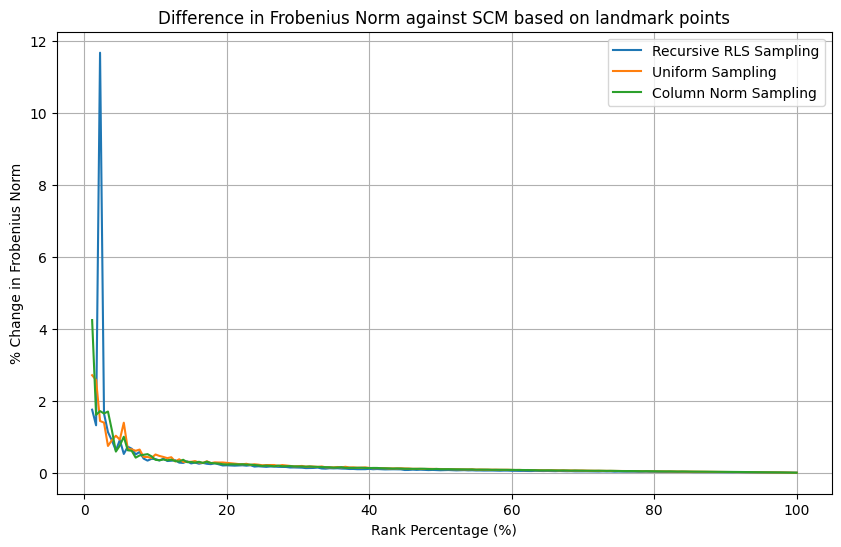

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def test1(X, Sigma, rank_start=2, rank_end=260):
    ranks = np.arange(rank_start, rank_end + 1)
    sampling_methods = {
        'Recursive RLS Sampling': recursive_rls_sample,
        'Uniform Sampling': uniform_random_sample,
        'Column Norm Sampling': column_norm_sample
    }

    frob_diffs = {method_name: [] for method_name in sampling_methods.keys()}

    for r in ranks:
        for method_name, method_func in sampling_methods.items():
            indices = method_func(X, num_landmarks=r)
            Sigma_hat = nystrom_covariance_estimator(X, indices)
            diff = frobenius_norm_difference(Sigma_hat, Sigma)
            frob_diffs[method_name].append(diff)

    return ranks, frob_diffs

def plot_frobenius_differences(ranks, frob_diffs):
    plt.figure(figsize=(10, 6))
    for method_name, diffs in frob_diffs.items():
        rank_percentage = ranks / np.max(ranks) * 100  # Rank as a percentage of max rank
        plt.plot(rank_percentage, diffs, label=method_name)
    
    plt.xlabel('Rank Percentage (%)')
    plt.ylabel('% Change in Frobenius Norm')
    plt.title('Difference in Frobenius Norm against SCM based on landmark points')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming X is your data matrix and Sigma is your sample covariance matrix.
X = pd.read_pickle('russell_minute_data.pkl').values
Sigma = sample_covariance_estimator(X)

ranks, frob_diffs = test1(X, Sigma, rank_start=2, rank_end=180)
plot_frobenius_differences(ranks, frob_diffs)


In [87]:
fro_diff_sample = pd.DataFrame(
    frob_diffs, index=ranks
)
fro_diff_sample.to_csv('fro_diff.csv')

##### TEST 3: Bias

In [31]:
def bias(Sigma, X, indices, k):
    """
    Computes the bias of the Nyström covariance estimator.

    Args:
    Sigma (np.array): The sample covariance matrix
    X (np.array): The data matrix
    indices (np.array): Indices of selected landmark points
    k (int): Number of landmark points

    Returns:
    np.array: The bias matrix
    """
    n, p = X.shape
    I = indices
    J = np.setdiff1d(np.arange(p), I)  # Indices not in I

    # Extract submatrices
    Sigma_I = Sigma[np.ix_(I, I)]    # Covariance of landmark points
    Sigma_J = Sigma[np.ix_(J, J)]    # Covariance of non-landmark points
    Sigma_IJ = Sigma[np.ix_(I, J)]   # Cross-covariance

    # Compute Schur complement
    Schur_complement = Sigma_J - Sigma_IJ.T @ np.linalg.inv(Sigma_I) @ Sigma_IJ
    
    # Compute bias for non-landmark points
    B_J = ((n - k) / n) * Schur_complement

    # Create full bias matrix
    Bias = np.zeros_like(Sigma)
    Bias[np.ix_(J, J)] = B_J
    
    return Bias

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def bias_test(X, Sigma, rank_start=2, rank_end=260):
    ranks = np.arange(rank_start, rank_end + 1)
    sampling_methods = {
        'Recursive RLS Sampling': recursive_rls_sample,
        'Uniform Sampling': uniform_random_sample,
        'Column Norm Sampling': column_norm_sample
    }

    frob_diffs = {method_name: [] for method_name in sampling_methods.keys()}

    for r in ranks:
        for method_name, method_func in sampling_methods.items():
            indices = method_func(X, num_landmarks=r)
            schur = bias(Sigma, X, indices, r)
            diff = np.linalg.norm(schur, 'fro')
            frob_diffs[method_name].append(diff)

    return ranks, frob_diffs

def plot_bias(ranks, frob_diffs):
    plt.figure(figsize=(10, 6))
    for method_name, diffs in frob_diffs.items():
        rank_percentage = ranks / np.max(ranks) * 100  # Rank as a percentage of max rank
        plt.plot(rank_percentage, diffs, label=method_name)
    
    plt.xlabel('Rank Percentage (%)')
    plt.ylabel('Norm of Bias Matrix')
    plt.title('Bias of the Nyström covariance estimator')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming X is your data matrix and Sigma is your sample covariance matrix.
X = pd.read_pickle('russell_minute_data.pkl').values
print(X[1])
Sigma = sample_covariance_estimator(X.T)
print(Sigma.shape)

ranks, bias_diffs = bias_test(X, Sigma, rank_start=2, rank_end=180)

plot_bias(ranks, bias_diffs)

[-0.00150455 -0.00150455 -0.00050227  0.00050252  0.          0.00050227
  0.         -0.00050202  0.          0.00100454  0.00250874  0.
  0.00050051  0.00050026 -0.00100002  0.00050051 -0.00100052 -0.00050076
  0.00150304  0.00450226 -0.00896416  0.00150757  0.         -0.00050177
 -0.00050202  0.          0.         -0.00050227  0.          0.
  0.          0.          0.          0.          0.00100505 -0.00100404
  0.          0.00050252  0.         -0.00050227  0.00050252  0.
 -0.00050227  0.00100505 -0.00050202  0.          0.00050227 -0.00050202
 -0.00050227  0.          0.00050252  0.          0.          0.
  0.          0.          0.          0.          0.00050227 -0.00050202
  0.          0.          0.00050227 -0.00050202  0.00050227  0.
 -0.00050202  0.          0.00050227 -0.00050202  0.00050227  0.
  0.          0.         -0.00050202  0.00050227  0.          0.00100404
 -0.00050152  0.          0.          0.          0.          0.00050177
  0.         -0.00100303  

IndexError: index 270 is out of bounds for axis 0 with size 180

In [90]:
bias_diff_sample = pd.DataFrame(
    bias_diffs, index=ranks
)   
bias_diff_sample.to_csv('bias_diff.csv')

##### Mean Squared Error

In [21]:
def mse(Sigma, Sigma_hat, X, k):
    """
    Computes the mean square error (MSE) of the Nyström covariance estimator.

    Parameters:
    Sigma (numpy.ndarray): The true covariance matrix.
    Sigma_hat (numpy.ndarray): The estimated covariance matrix using Nyström method.
    X (numpy.ndarray): The data matrix.
    k (int): The number of landmarks used in the Nyström method.

    Returns:
    float: The difference between the MSE of the Nyström estimator and the sample covariance estimator.
    """
    p, n = X.shape
    Sigma_I = Sigma_hat

    # MSE of the sample covariance estimator of the Schur complement
    MSE_Sigma_I_Schur = (1 / (n - k)) * (np.trace(Sigma_I @ Sigma_I) + np.trace(Sigma_I) ** 2)

    # MSE of the sample covariance estimator
    MSE_Sigma = (1 / n) * (np.trace(Sigma @ Sigma) + np.trace(Sigma) ** 2)

    # Compute the MSE of the Nyström covariance estimator
    MSE = MSE_Sigma + (((n - k)** 2) / n ** 2) * (np.linalg.norm(Sigma_I, 'fro') - MSE_Sigma_I_Schur)

    return MSE

(1014, 180)


/var/folders/85/xp45dt5j04s4zr5n2396mrpr0000gn/T/ipykernel_48007/1258628704.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  MSE_Sigma_I_Schur = (1 / (n - k)) * (np.trace(Sigma_I @ Sigma_I) + np.trace(Sigma_I) ** 2)
/var/folders/85/xp45dt5j04s4zr5n2396mrpr0000gn/T/ipykernel_48007/1258628704.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  MSE = MSE_Sigma + (((n - k)** 2) / n ** 2) * (np.linalg.norm(Sigma_I, 'fro') - MSE_Sigma_I_Schur)


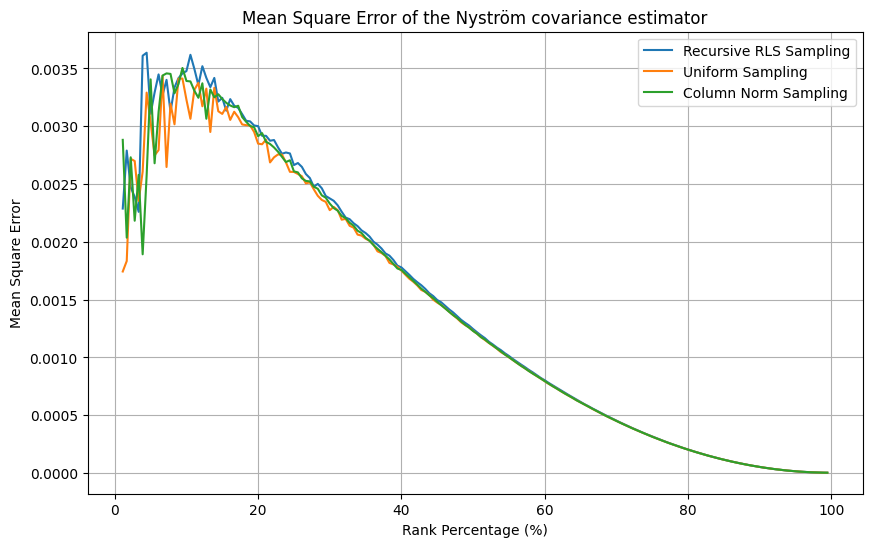

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def mse_test(X, Sigma, rank_start=2, rank_end=260):
    ranks = np.arange(rank_start, rank_end + 1)
    sampling_methods = {
        'Recursive RLS Sampling': recursive_rls_sample,
        'Uniform Sampling': uniform_random_sample,
        'Column Norm Sampling': column_norm_sample
    }

    frob_diffs = {method_name: [] for method_name in sampling_methods.keys()}

    for r in ranks:
        for method_name, method_func in sampling_methods.items():
            indices = method_func(X, num_landmarks=r)
            Sigma_hat = nystrom_covariance_estimator(X, indices)
            diff = mse(Sigma, Sigma_hat, X, r)
            frob_diffs[method_name].append(diff)

    return ranks, frob_diffs

def plot_bias(ranks, frob_diffs):
    plt.figure(figsize=(10, 6))
    for method_name, diffs in frob_diffs.items():
        rank_percentage = ranks / np.max(ranks) * 100  # Rank as a percentage of max rank
        plt.plot(rank_percentage, diffs, label=method_name)
    
    plt.xlabel('Rank Percentage (%)')
    plt.ylabel('Mean Square Error')
    plt.title('Mean Square Error of the Nyström covariance estimator')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming X is your data matrix and Sigma is your sample covariance matrix.
X = pd.read_pickle('russell_minute_data.pkl').values
print(X.shape)
Sigma = sample_covariance_estimator(X)

ranks, frob_diffs = mse_test(X, Sigma, rank_start=2, rank_end=180)

plot_bias(ranks, frob_diffs)

#### Principal Component Analysis

##### Nystrom PCA Random Sampling 

In [68]:
#### NYSTROM PCAAAAA IS HEREEEEE
def nystrom_pca(X, indices, num_landmarks):
    """
    Estimates the principal components of a data matrix using the Nyström method.

    Args:
    X (numpy.ndarray): Input data matrix of shape (n, p)
    indices (numpy.ndarray): Indices for landmark points
    num_landmarks (int): Number of landmark points

    Returns:
    tuple: Eigenvalues and eigenvectors of the approximated covariance matrix
    """
    n, p = X.shape  # n: number of samples, p: number of features
    
    # Step 1: Extract landmark points
    Y = X[:, indices]  # Y.shape = (n, num_landmarks)

    # Step 2: Define complement set J and corresponding data
    indices_J = np.setdiff1d(np.arange(p), indices)
    Z = X[:, indices_J]  # Z.shape = (n, p - num_landmarks)

    # Step 3: Compute thin SVD of Y
    U_Y, D_Y, V_Y_T = np.linalg.svd(Y, full_matrices=False)
    
    # Step 4: Construct W_Y and W_Z
    W_Y = (1 / np.sqrt(n)) * np.diag(D_Y) @ V_Y_T
    W_Z = (1 / np.sqrt(n)) * U_Y.T @ Z

    # Step 5: Initialize and populate W
    W = np.zeros((p, num_landmarks))
    W[indices, :] = W_Y.T
    W[indices_J, :] = W_Z

    # Step 6: Perform thin SVD on W
    U, Lambda, V_T = np.linalg.svd(W, full_matrices=False)

    # Step 7: Compute eigenvalues and eigenvectors
    eigenvalues = Lambda**2
    eigenvectors = V_T.T

    return eigenvalues, eigenvectors

def sample_svd(X):
    """
        Estimates the sample covariance matrix of a data matrix.
    """
    n = X.shape[1]
    U_Y, D_Y, V_Y_T = np.linalg.svd(X, full_matrices=False)
    eigenvalues = D_Y**2 / n
    eigenvectors = U_Y

 
    return eigenvalues, eigenvectors

6.960963755655638e-16
1.4247102586232302e-15
11.478714791067949
0.9


Finished 10 iterations
Finished 20 iterations
Finished 30 iterations
Finished 40 iterations
Finished 50 iterations


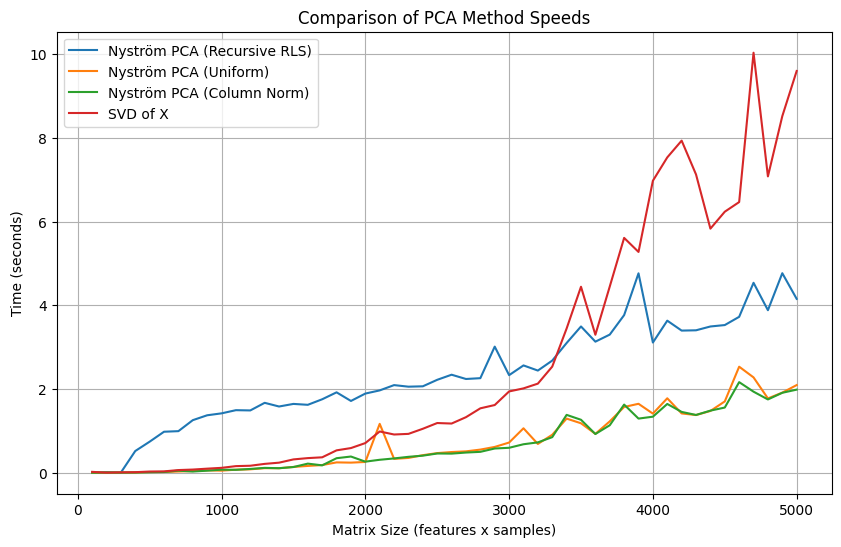

Results saved to 'pca_comparison_results.csv'


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

# Assuming the following functions are defined:
# - generate_low_rank_data(p, n, rank): generates a low-rank matrix
# - nystrom_pca(X, indices): performs Nyström PCA using given indices
# - cholesky_sample(X, num_landmarks): returns indices based on Cholesky sampling
# - uniform_random_sample(X, num_landmarks): returns indices based on random sampling
# - column_norm_sample(X, num_landmarks): returns indices based on column norm sampling
# - sample_eigenvalues_eigenmatrices(X): performs traditional PCA

def compare_pca_methods(max_size, step):
    sizes = range(step, max_size + 1, step)
    
    times_nystrom_rls = []
    times_nystrom_random = []
    times_nystrom_column = []
    times_sample = []
    matrix_sizes = []
    i = 0
    
    for size in sizes:
        i += 1
        p = size
        n = size // 2
        rank = size // 5

        # Generate a low rank data matrix
        X = generate_low_rank_data(p, n, rank)

        # Nyström PCA (Cholesky sampling)
        start_time = timer()
        indices_cholesky = recursive_rls_sample(X, num_landmarks=rank)
        nystrom_pca(X, rank, indices_cholesky)
        end_time = timer()
        times_nystrom_rls.append(end_time - start_time)

        # Nyström PCA (Random sampling)
        start_time = timer()
        indices_random = uniform_random_sample(X, num_landmarks=rank)
        nystrom_pca(X, rank, indices_random)
        end_time = timer()
        times_nystrom_random.append(end_time - start_time)

        # Nyström PCA (Column Norm sampling)
        start_time = timer()
        indices_column = column_norm_sample(X, num_landmarks=rank)
        nystrom_pca(X, rank, indices_column)
        end_time = timer()
        times_nystrom_column.append(end_time - start_time)

        # Traditional PCA
        start_time = timer()
        sample_svd(X)
        end_time = timer()
        times_sample.append(end_time - start_time)

        # Store the matrix size for each measurement
        matrix_sizes.append(size)

        if i % 10 == 0:
            print(f"Finished {i} iterations")

    # Create a DataFrame to store the results
    df_results = pd.DataFrame({
        'Matrix_Size': matrix_sizes,
        'Recursive RLS Sampling': times_nystrom_rls,
        'Uniform Sampling': times_nystrom_random,
        'Column Rank Sampling': times_nystrom_column,
        'SVD of X': times_sample
    })

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_results['Matrix_Size'], df_results['Recursive RLS Sampling'], label='Nyström PCA (Recursive RLS)')
    plt.plot(df_results['Matrix_Size'], df_results['Uniform Sampling'], label='Nyström PCA (Uniform)')
    plt.plot(df_results['Matrix_Size'], df_results['Column Rank Sampling'], label='Nyström PCA (Column Norm)')
    plt.plot(df_results['Matrix_Size'], df_results['SVD of X'], label='SVD of X')
    plt.xlabel('Matrix Size (features x samples)')
    plt.ylabel('Time (seconds)')
    plt.title('Comparison of PCA Method Speeds')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_results

# Parameters
max_matrix_size = 5000  # maximum size of the matrix
step_size = 100         # step size for increasing matrix size

# Compare the different PCA methods and get the DataFrame
df_results = compare_pca_methods(max_matrix_size, step_size)

# Save the results to a CSV file
df_results.to_csv('pca_comparison_results.csv', index=False)

print("Results saved to 'pca_comparison_results.csv'")